In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras

In [2]:
IMG_SIZE = 128
BATCH_SIZE = 32

dataset = tf.keras.utils.image_dataset_from_directory(
    'archive/flowers',                      
    image_size=(IMG_SIZE, IMG_SIZE),
    label_mode='int',               
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
    
)

Found 4317 files belonging to 5 classes.


In [3]:
x_list = []
y_list = []

for images, labels in dataset:
    x_list.append(images.numpy())
    y_list.append(labels.numpy())

x_train = np.concatenate(x_list)
y_train = np.concatenate(y_list)
x_train=x_train/255
split_index = int(0.8 * len(x_train))
x_train_80 = x_train[:split_index]
y_train_80 = y_train[:split_index]

from tensorflow.keras.utils import to_categorical
y_train_80 = to_categorical(y_train_80, num_classes=5)

x_test_20=x_train[split_index+1:]
y_test_20=y_train[split_index+1:]
y_test_20 = to_categorical(y_test_20, num_classes=5)


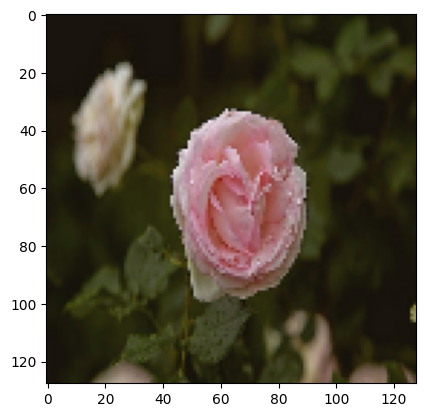

In [4]:
idx=random.randint(0,len(x_train))
plt.imshow(x_train[idx,:])


In [5]:
model=Sequential([Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),MaxPooling2D((2,2)),
                  Conv2D(32,(3,3),activation='relu'),MaxPooling2D((2,2)),
                  Flatten(),
                  Dense(128,activation='relu'),
                  Dense(5,activation='softmax')
                  
                 
                 ])

C:\Users\ASHWAL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(x_train_80.shape)
print(y_train_80.shape)


(3453, 128, 128, 3)
(3453, 5)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,        
    width_shift_range=0.1,     
    height_shift_range=0.1,    
    horizontal_flip=True,      
    fill_mode='nearest'        
)

datagen.fit(x_train_80)


In [12]:
from tensorflow.keras.layers import Dropout
model.add(Dropout(0.5))

history = model.fit(
    x_train_80, y_train_80,
    validation_data=(x_test_20, y_test_20),
    batch_size=64,
    epochs=10
)


Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 556ms/step - accuracy: 0.4596 - loss: nan - val_accuracy: 0.5991 - val_loss: 1.2518
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 561ms/step - accuracy: 0.4705 - loss: nan - val_accuracy: 0.5910 - val_loss: 1.2876
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 549ms/step - accuracy: 0.4795 - loss: nan - val_accuracy: 0.6002 - val_loss: 1.2693
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 28s 519ms/step - accuracy: 0.5129 - loss: nan - val_accuracy: 0.6315 - val_loss: 1.4458
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 27s 508ms/step - accuracy: 0.5026 - loss: nan - val_accuracy: 0.6130 - val_loss: 1.3993
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 47s 597ms/step - accuracy: 0.5045 - loss: nan - val_accuracy: 0.6014 - val_loss: 1.4509
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 528ms/step - accuracy: 0.5110 - loss: nan - val_accuracy: 0.6002 - val_loss: 1.6143
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 574ms/step - accuracy: 0.4802 - loss: nan - val_accuracy: 0.6083 - val_loss:

In [9]:
model.evaluate(x_test_20,y_test_20)

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.5887 - loss: 1.3058


[1.2759708166122437, 0.5863267779350281]

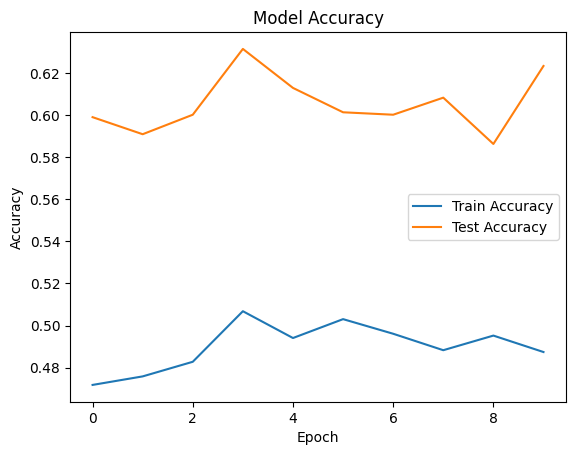

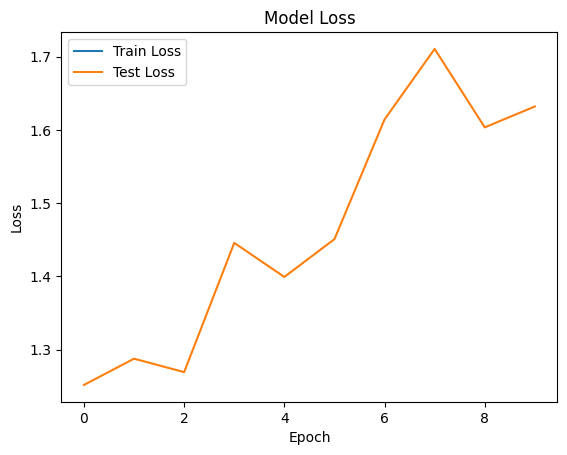

In [13]:


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
[[1.7197044e-05 1.3953779e-03 5.8591221e-03 3.0540570e-04 9.9242300e-01]]
tulip


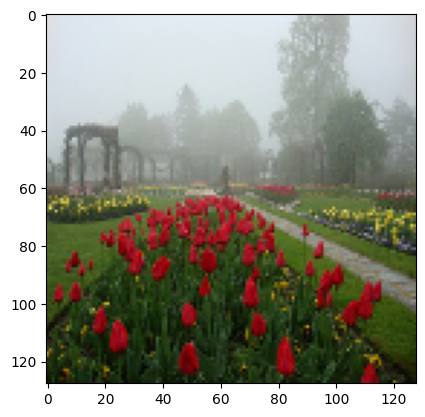

In [14]:
idx2=random.randint(0,len(y_test_20))
plt.imshow(x_test_20[idx2,:])
pred=model.predict(x_test_20[idx2,:].reshape(1,128,128,3))
print(pred)
pred_class = np.argmax(pred)
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print(class_names[pred_class])


In [29]:

from tensorflow.keras.layers import GlobalAveragePooling2D

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Replaces Flatten
    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

C:\Users\ASHWAL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
task2 = model.fit(
    x_train_80, y_train_80,
    validation_data=(x_test_20, y_test_20),
    batch_size=64,
    epochs=20
)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.5999 - loss: 0.9875 - val_accuracy: 0.5968 - val_loss: 0.9714
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6212 - loss: 0.9946 - val_accuracy: 0.6419 - val_loss: 0.8976
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6134 - loss: 0.9732 - val_accuracy: 0.6222 - val_loss: 0.9439
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6341 - loss: 0.9253 - val_accuracy: 0.6454 - val_loss: 0.8839
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.6255 - loss: 0.9322 - val_accuracy: 0.6454 - val_loss: 0.8838
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6449 - loss: 0.8982 - val_accuracy: 0.6443 - val_loss: 0.8851
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.6450 - loss: 0.9308 - val_accuracy: 0.6454 - val_loss: 0.8786
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - accuracy: 0.6434 - loss: 0.9166 - val_accuracy: 0.6385 - val_loss:

In [33]:
model.evaluate(x_test_20,y_test_20)

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 195ms/step - accuracy: 0.6962 - loss: 0.7894


[0.7863739132881165, 0.6964078545570374]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[[0.00574566 0.15407561 0.00116682 0.81815845 0.02085339]]
sunflower


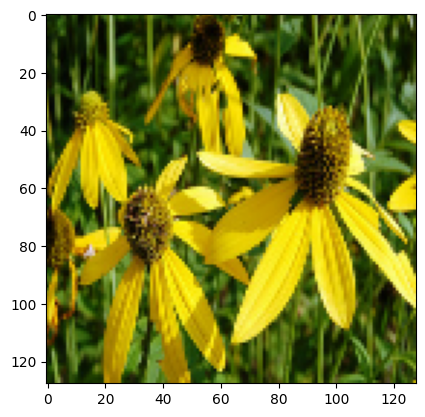

In [38]:
idx2=random.randint(0,len(y_test_20))
plt.imshow(x_test_20[idx2,:])
pred=model.predict(x_test_20[idx2,:].reshape(1,128,128,3))
print(pred)
pred_class = np.argmax(pred)

y_true = np.argmax(y_test_20, axis=1)  
class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
print(class_names[pred_class])


In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [40]:
y_pred = model.predict(x_test_20)
print(y_pred.shape)

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 176ms/step
(863, 5)


In [41]:
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred_classes)

[3 3 2 3 4 3 1 0 3 0 1 3 3 4 3 4 1 0 3 1 2 1 3 4 4 3 0 1 4 2 1 3 2 4 0 3 4
 4 0 0 1 4 4 0 0 3 1 1 2 1 3 3 0 2 3 0 0 4 0 4 3 0 3 4 0 4 3 0 0 4 3 0 3 4
 3 1 1 2 2 2 4 3 0 1 3 1 3 1 1 4 4 1 2 4 0 2 3 3 2 0 0 2 3 0 4 3 0 3 3 3 1
 2 4 1 0 0 0 4 0 2 2 4 4 0 3 4 4 3 4 0 0 4 4 0 4 0 1 1 1 3 1 0 3 4 2 1 3 3
 3 2 1 0 0 0 1 2 0 1 3 2 1 2 3 2 4 4 3 4 2 2 4 2 0 0 3 3 3 3 1 0 1 2 0 4 4
 1 1 4 1 4 1 3 2 4 4 2 2 1 3 3 2 4 4 3 0 3 4 3 4 4 4 4 2 1 1 3 0 3 3 1 4 1
 4 2 4 3 0 0 4 1 4 1 3 3 0 3 0 3 0 3 4 3 1 1 0 1 2 3 4 3 1 0 1 3 4 4 3 4 0
 0 3 0 2 3 4 4 0 3 3 1 0 1 3 4 1 3 3 4 0 4 4 4 1 4 1 0 4 0 3 4 3 2 1 4 1 3
 1 3 3 0 3 3 4 4 4 3 4 3 3 0 1 1 4 1 1 4 3 3 3 0 0 0 0 2 3 0 4 3 2 3 3 3 4
 3 3 4 2 2 2 0 2 4 1 4 4 3 1 3 1 1 0 2 4 1 0 4 0 0 4 2 1 1 1 4 3 3 2 2 1 2
 2 1 1 1 4 1 1 4 3 1 0 4 3 0 3 3 2 0 1 1 1 0 3 1 1 0 3 3 3 2 0 2 3 2 3 1 1
 4 2 1 3 0 0 3 2 1 3 0 4 1 3 4 3 2 3 1 0 1 3 2 4 2 1 3 0 4 3 2 0 1 4 0 4 2
 1 3 4 2 4 3 0 1 1 2 3 3 0 3 0 4 1 3 0 4 4 1 3 1 1 4 2 3 3 4 4 2 4 0 3 3 4
 3 0 1 1 4 3 4 0 3 0 4 1 

In [42]:
y_true_classes = np.argmax(y_test_20, axis=1) 
print(y_true_classes)

[3 3 4 3 4 3 1 0 1 0 1 3 3 2 3 2 0 0 3 0 1 1 0 4 4 3 0 1 4 2 1 3 2 4 3 1 4
 4 0 3 4 4 4 4 0 3 1 1 2 1 3 2 0 2 3 2 1 4 0 2 3 0 3 4 0 4 3 4 0 4 1 1 1 2
 3 1 1 0 2 2 2 3 0 4 3 0 3 4 3 4 2 0 4 4 2 2 3 3 2 4 0 2 1 0 4 0 0 3 3 4 1
 4 4 1 2 2 4 4 0 2 2 4 2 0 3 4 4 1 4 0 0 4 4 2 4 0 4 1 1 3 1 0 1 4 4 1 3 3
 3 2 1 0 0 0 1 2 4 0 3 2 1 2 3 2 4 4 3 4 2 2 4 4 0 0 1 1 1 3 0 0 1 4 0 4 4
 1 1 2 1 4 1 1 2 2 4 2 4 0 1 1 2 4 4 1 0 3 4 3 4 4 4 4 4 1 1 1 2 3 3 1 4 1
 3 0 4 1 2 2 4 1 4 1 3 3 3 3 0 3 1 1 4 3 1 1 0 1 2 3 4 3 0 1 1 3 2 4 3 4 1
 0 3 4 4 1 4 4 0 1 3 1 0 1 2 2 1 3 3 2 2 4 2 4 1 2 1 0 4 2 3 4 1 2 0 4 2 3
 1 3 3 2 3 3 4 4 2 3 4 1 1 0 1 0 2 0 4 4 3 0 3 0 0 2 0 0 4 0 4 3 2 3 0 3 2
 3 3 4 4 2 2 1 4 4 1 4 4 3 1 3 1 1 0 0 2 1 0 4 0 2 4 2 4 1 1 4 1 4 2 4 1 2
 2 0 1 1 4 1 4 4 4 1 0 4 3 0 3 3 4 0 1 0 3 1 4 1 1 0 3 3 3 2 0 2 2 4 3 1 1
 4 4 1 3 0 0 3 4 0 1 0 4 1 3 4 3 0 4 1 2 0 3 2 4 2 2 3 3 4 2 2 3 1 2 1 4 2
 1 3 2 2 4 3 2 1 1 2 0 3 2 3 3 4 1 1 2 2 1 1 3 1 2 4 2 3 3 4 2 2 4 0 3 3 4
 3 0 1 1 4 0 4 0 1 0 4 1 

In [43]:
cm = confusion_matrix(y_true_classes, y_pred_classes)

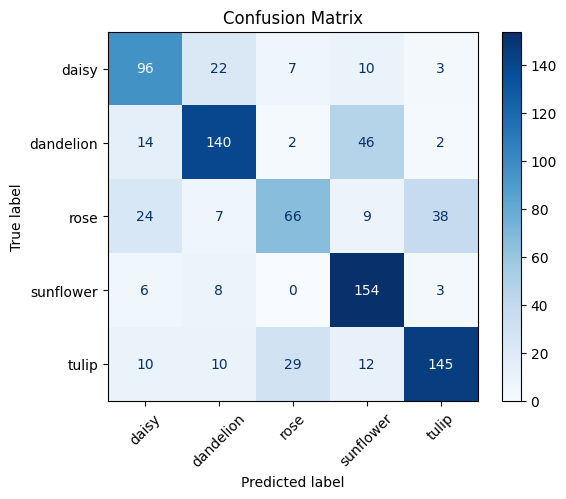

In [44]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))


              precision    recall  f1-score   support

       daisy       0.64      0.70      0.67       138
   dandelion       0.75      0.69      0.72       204
        rose       0.63      0.46      0.53       144
   sunflower       0.67      0.90      0.77       171
       tulip       0.76      0.70      0.73       206

    accuracy                           0.70       863
   macro avg       0.69      0.69      0.68       863
weighted avg       0.70      0.70      0.69       863

